In [2]:
import pandas as pd
import seaborn as sns
import scipy.stats as ss
import numpy as np
%matplotlib inline

- 数据字段说明：

  - gender：性别，1为男性，2为女性
  - Temperature:体温
  - HeartRate：心率
  - 共130行，3列
  - 解决问题:人体体温的总体均值是否为98.6华氏度？

In [3]:
df = pd.read_csv("img/test.csv")

In [4]:
df.head(5)

,Temperature,Gender,HeartRate
0,96.3,1,70
1,96.7,1,71
2,96.9,1,74
3,97.0,1,80
4,97.1,1,73


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 130 entries, 0 to 129
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Temperature  130 non-null    float64
 1   Gender       130 non-null    int64  
 2   HeartRate    130 non-null    int64  
dtypes: float64(1), int64(2)
memory usage: 3.2 KB


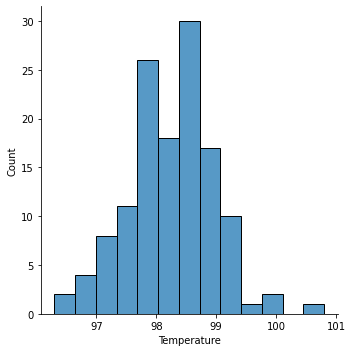

In [6]:
# 1. 先绘制直方图。看一下数据的分布。
sns.displot(df["Temperature"],kind="hist")

In [7]:
# 1. ss.kstest() 检验是否是正态分布
# 即使不是正态分布也没关系，因为抽样均值在每个样本容量>30时，是正态分布。
ss.kstest(df["Temperature"], "norm") # p<0.5. Temperature is not normal distribution

KstestResult(statistic=1.0, pvalue=0.0)

In [8]:
# z-test 
'''
1. 提出原假设 根据题意为双边假设。
2. 找到参数 mu, mean, sigma, S，n
n=130
mean = 98.6
S 

 2.1 计算z
 2.2 根据z 计算p
 2.3 使用ss.ttest_lsamp()直接得到t, p.
3. 规定显著水平
'''

'\n1. 提出原假设 根据题意为双边假设。\n2. 找到参数 mu, mean, sigma, S，n\nn=130\nmean = 98.6\nS \n\n 2.1 计算z\n 2.2 根据z 计算p\n 2.3 使用ss.ttest_lsamp()直接得到t, p.\n3. 规定显著水平\n'

In [9]:
n=130
mu = 98.6
S = np.std(df["Temperature"], axis=0)

In [10]:
S

0.730357778905038

In [11]:
t, p = ss.ttest_1samp(df["Temperature"], mu)
print("t is %s and p is %s"%(t, p))

t is -5.454823292364077 and p is 2.410632041561008e-07


In [12]:
p/2< 0.5 # H0 不成立

True

注意:ttest_1samp输出的是双侧检验的概率,

左侧检验:

t>0:1-p/2

t<0:p/2

右侧检验:

t>0:p/2

t<0:1-p/2

## 样本数>30 也可以使用z检验

api: statsmodels.stats.weightstats.ztest

- 参数:
  - x1:数组，第一个样本的数据值
  - x2:数组，第二个样本的数据值，默认没有值
  
- value:浮点型数值
  - 若是单样本，则 value 是样本假设的均值
  - 若是双样本，则 value是两个样本均值的差值
  
- alternative
  - 若为 `larger’，备选假设 H1 大于 value 值
  - 若为 `smaller’，备选假设 H1 小于 value 值
  
- 返回值:
  - tstats:统计量值
  - pvalue:p值

In [57]:
import statsmodels.stats.weightstats as sw

In [58]:
sw.ztest(df["Temperature"],value=98.6)

(-5.454823292364077, 4.902157014113424e-08)

## 在拒绝原假设之后，要计算效应量。
 - 效应量看的是差异的显著级别。
 
 <img src = "img/d.png">

$单样本均值检验效应量: Cohen's\ d=\frac{\bar{X}-\mu}{S}$

In [14]:
# 效应量计算
mean = df["Temperature"].mean()
S = np.sqrt(np.sum(np.square(df["Temperature"]- mean))/(df.shape[0]-1))
d = (mean-98.6)/S

In [15]:
d

-0.47841965124708796

- 总结

1. $\sigma^2$ 已知,假定样本均值服从正态分布,用Z检验

2. $\sigma^2$ 未知,大样本情况下,也假定样本均值服从正态分布,用z检验

3. 由于大样本情况下,t分布近似z分布,所以也可以用t检验

4. $\sigma^2$未知,小样本,样本均值服从t分布,用t检验

- 注意:t分布跟样本大小有关,所以有个概念—自由度

5. 实际中常使用t检验

6. Api:

t检验 scipy.stats.ttest_1samp

z检验 statsmodels.stats.weightstats.ztest